# Linear Regression(이론)

# Linear Regression(구현)

# Logistic Regression(이론/구현)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(1)
plt.style.use("seaborn")

# set params
N, n_features = 250, 12
lr = 0.01
epochs = 100
b_size = 32

# weight, bias
t_W = np.random.uniform(-1, 1, (n_features, 1))
t_b = np.random.uniform(-1, 1, (1, 1))
W = np.random.uniform(-1, 1, (n_features, 1))
b = np.random.uniform(-1, 1, (1, 1))
n_batch = N//b_size

# generate dataset
x_data = np.random.normal(0,1,(N,n_features))
y_data = x_data @ t_W + t_b
y_data = (y_data>0).astype(np.int64)

# training
J_track = list()
acc_track = list()

for epoch in range(epochs):
    for b_idx in range(n_batch):
        # get minibatches
        X = x_data[b_idx*b_size:(b_idx+1)*b_size, ...]
        Y = y_data[b_idx*b_size:(b_idx+1)*b_size, ...]
        
        # forward propagation
        Z = X @ W + b
        Pred = 1/(1+np.exp(-Z))
        J0 = -(Y*np.log(Pred) + (1-Y)*np.log(1-Pred))
        J = np.mean(J0)
        J_track.append(J)
        
        # calculate acc
        Pred_ = (Pred>0.5).astype(np.int16)
        n_correct = np.sum((Pred_==Y).astype(np.int16))
        acc = n_correct/b_size
        acc_track.append(acc)
        
        # jacobians
        dJ_dJ0 = 1/N*np.ones((1,b_size))
        dJ0_dPred = np.diag(((Pred-Y)/(Pred*(1-Pred))).flatten())
        dPred_dZ = np.diag((Pred*(1-Pred)).flatten())
        dZ_dW = X
        dZ_db = np.ones((b_size, 1))
        
        # backpropagation
        dJ_dPred = dJ_dJ0 @ dJ0_dPred
        dJ_dZ = dJ_dPred @ dPred_dZ
        dJ_dW = dJ_dZ @ dZ_dW
        dJ_db = dJ_dZ @ dZ_db
        
        # parameter update
        W = W - lr*dJ_dW.T
        b = b - lr*dJ_db.T

/tmp/ipykernel_2942/2901596504.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


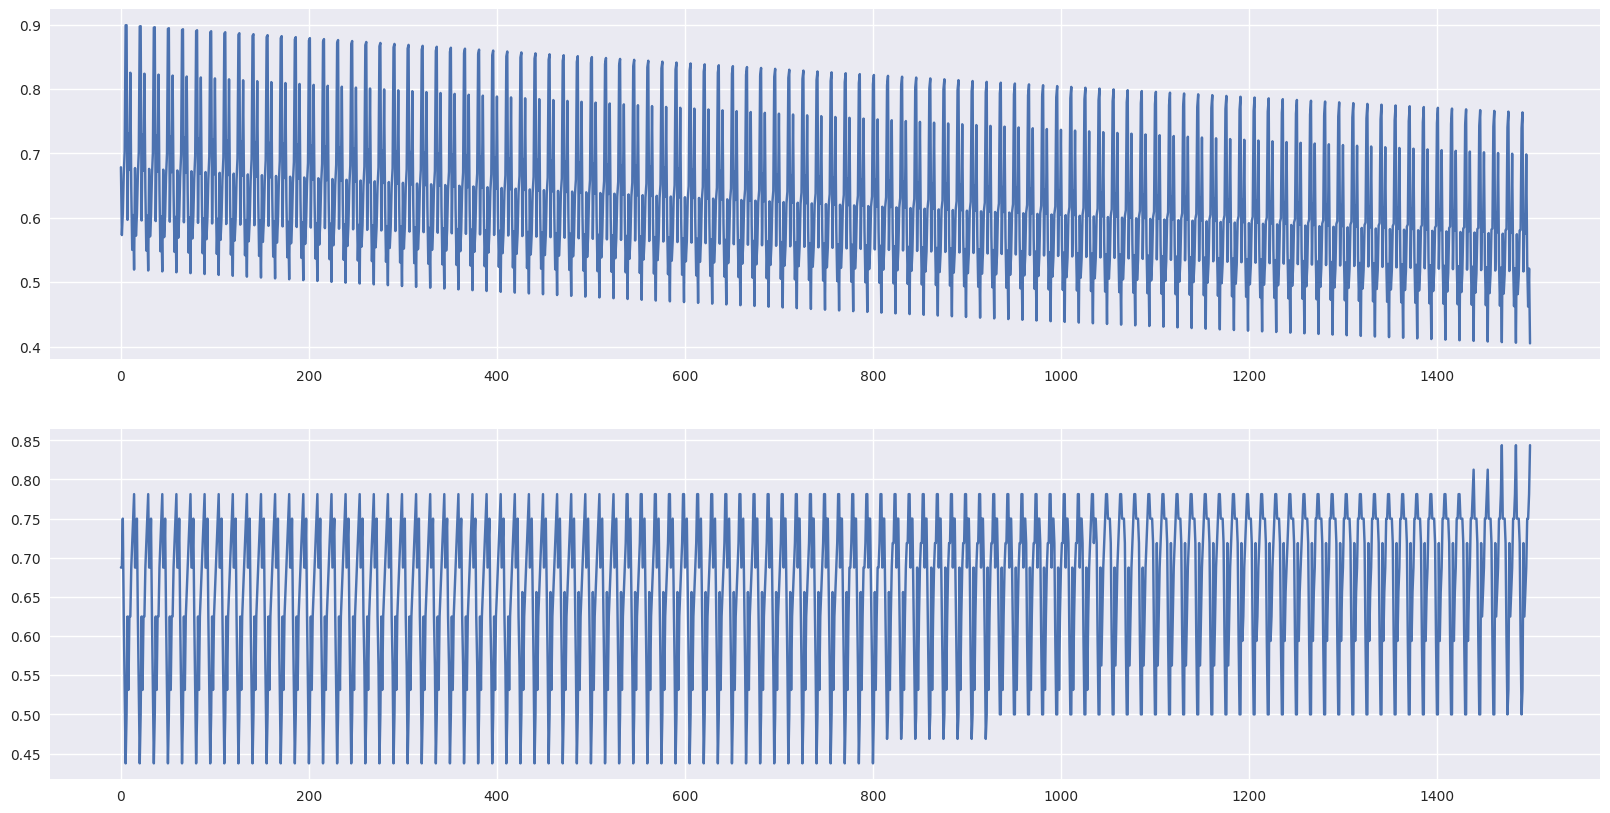

In [15]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)